In [1]:
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 29.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
df = pd.read_csv('/content/drive/MyDrive/hotel_reviews.csv')
df.head()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


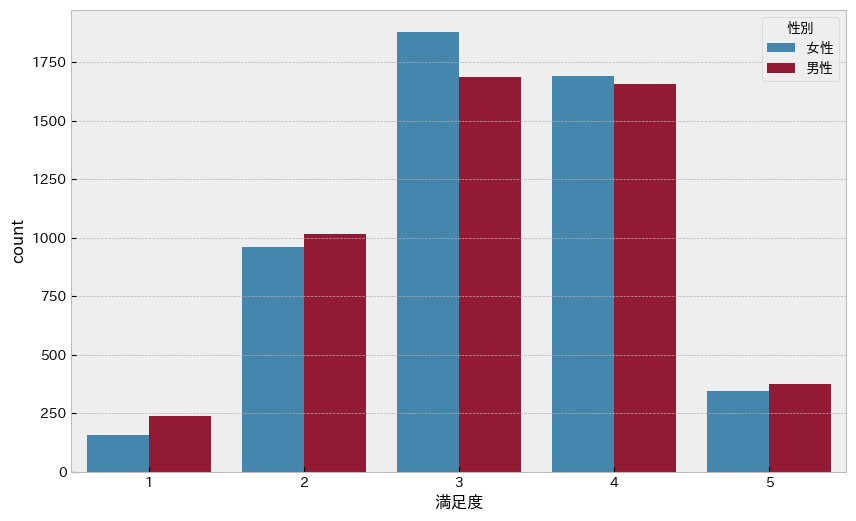

In [3]:
sns.countplot(x='満足度', hue='性別', data=df);

In [4]:
group = df.groupby('性別')
group['満足度'].agg(['mean', 'median'])

,mean,median
性別,,
女性,3.219638,3.0
男性,3.183940,3.0


In [5]:
group1 = group.get_group('男性')
group2 = group.get_group('女性')

In [6]:
group1.head(3)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4
5,男性,52,グループ,学生,2,3,3,3,2,2,1,3,2,2


In [7]:
group1['満足度']

3       3
4       4
5       2
6       3
12      3
       ..
9993    3
9994    5
9996    3
9997    5
9999    4
Name: 満足度, Length: 4969, dtype: int64

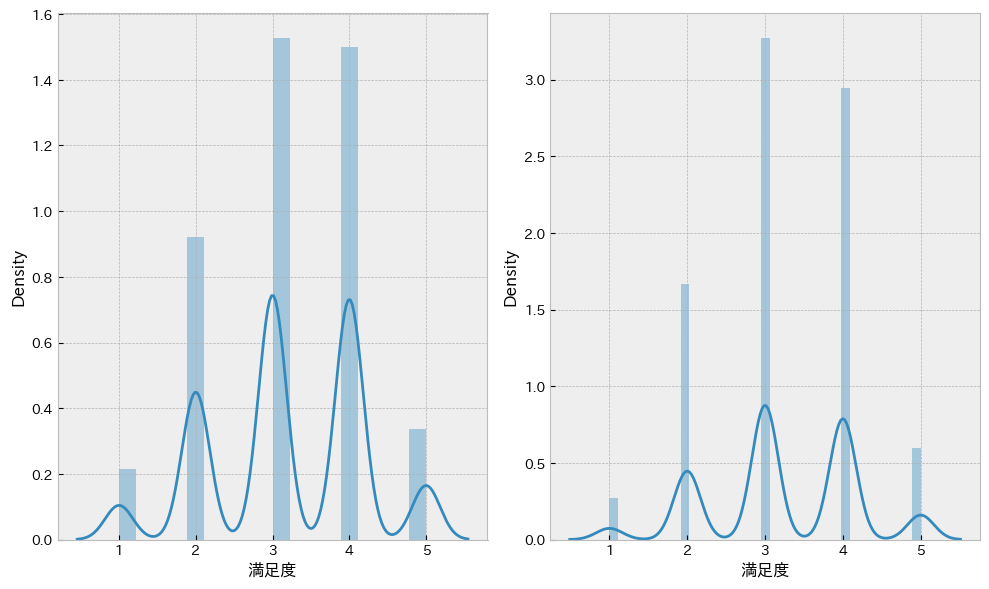

In [8]:
# 可視化  
plt.subplot(1, 2, 1)
sns.distplot(group1['満足度'])
plt.subplot(1, 2, 2)
sns.distplot(group2['満足度'])
plt.tight_layout()

In [9]:
# コルモゴロフ・スミルノフ検定
stats.kstest(group1['満足度'],"norm")

KstestResult(statistic=0.9297554023645598, pvalue=0.0, statistic_location=2, statistic_sign=-1)

In [10]:
stats.kstest(group2['満足度'],"norm")

KstestResult(statistic=0.9460433484732081, pvalue=0.0, statistic_location=2, statistic_sign=-1)

In [11]:
stats.mannwhitneyu(group1['満足度'], group2['満足度'], alternative='two-sided')

MannwhitneyuResult(statistic=12311050.0, pvalue=0.1708277786931579)

<Axes: xlabel='満足度', ylabel='count'>

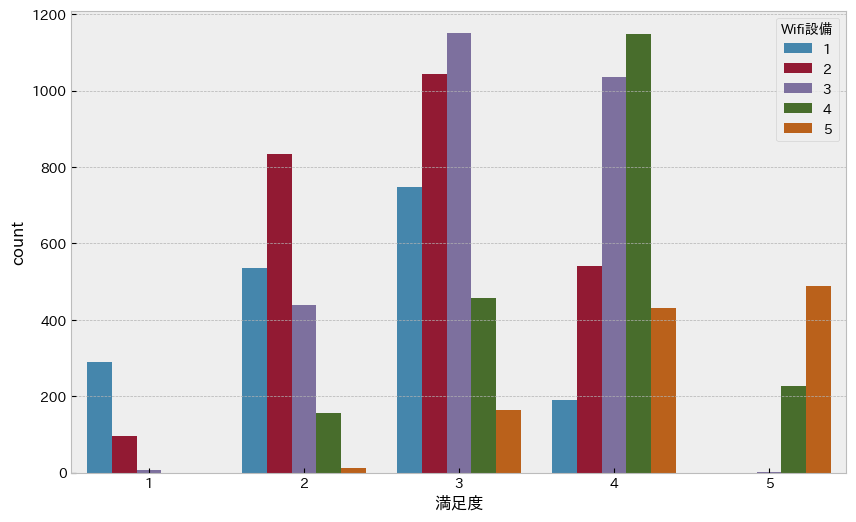

In [12]:
sns.countplot(x='満足度', hue='Wifi設備', data=df)

In [13]:
# WiFi設備の評価ごとの満足度の代表値
group = df.groupby('Wifi設備')
group['満足度'].agg(['mean', 'median'])

,mean,median
Wifi設備,,
1,2.476461,3.0
2,2.807234,3.0
3,3.221168,3.0
4,3.727364,4.0
5,4.274385,4.0


In [14]:
# 関数化しておく
crosstab = pd.crosstab(df['満足度'], df['Wifi設備'])
crosstab

Wifi設備,1,2,3,4,5
満足度,,,,,
1,289,96,8,0,0
2,535,835,439,155,12
3,749,1043,1152,458,164
4,190,542,1036,1149,432
5,0,0,1,226,489


In [15]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:5356.10247526457
p 値:0.0
自由度:16


In [16]:
group = df.groupby('Wifi設備')
group['満足度'].agg(['mean', 'median'])

,mean,median
Wifi設備,,
1,2.476461,3.0
2,2.807234,3.0
3,3.221168,3.0
4,3.727364,4.0
5,4.274385,4.0


In [17]:
satis_0 = df.query('Wifi設備<=3')
satis_0.head(3)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
5,男性,52,グループ,学生,2,3,3,3,2,2,1,3,2,2


In [18]:
satis_1 = df.query('Wifi設備>=4')
satis_1.head(3)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


In [19]:
print(f'Wifi設備3以下：{satis_0["満足度"].mean()}')
print(f'Wifi設備4以上：{satis_1["満足度"].mean()}')

Wifi設備3以下：2.880694143167028
Wifi設備4以上：3.9218800648298218


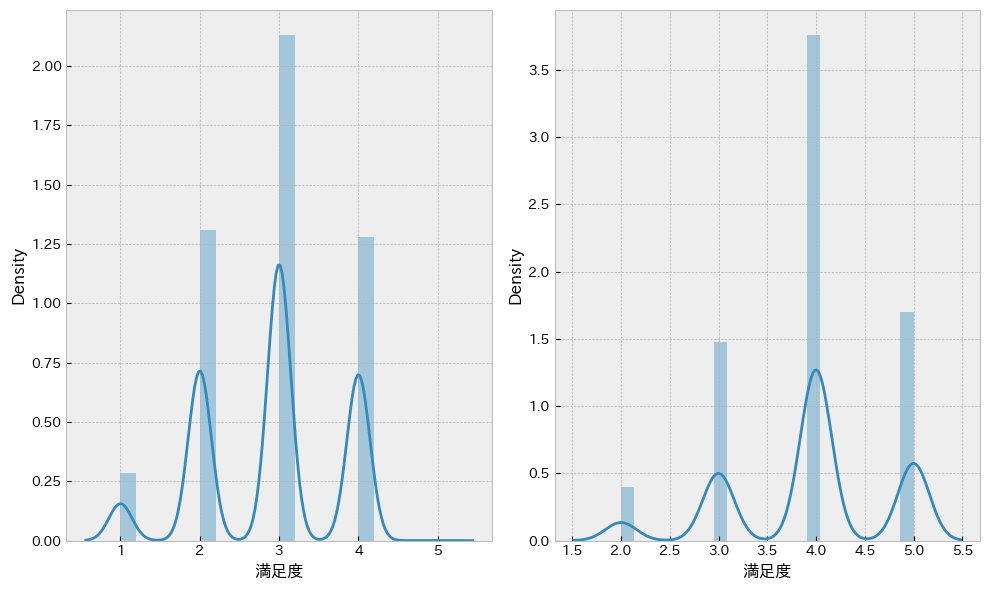

In [20]:
plt.subplot(1, 2, 1)
sns.distplot(satis_0['満足度'])
plt.subplot(1, 2, 2)
sns.distplot(satis_1['満足度'])
plt.tight_layout()

In [21]:
print(stats.kstest(satis_0['満足度'], "norm"))
print(stats.kstest(satis_1['満足度'], "norm"))

KstestResult(statistic=0.920416896251387, pvalue=0.0, statistic_location=2, statistic_sign=-1)
KstestResult(statistic=0.9772498680518208, pvalue=0.0, statistic_location=2, statistic_sign=-1)


In [22]:
stats.mannwhitneyu(satis_0['満足度'], satis_1['満足度'], alternative='two-sided')

MannwhitneyuResult(statistic=4353567.0, pvalue=0.0)

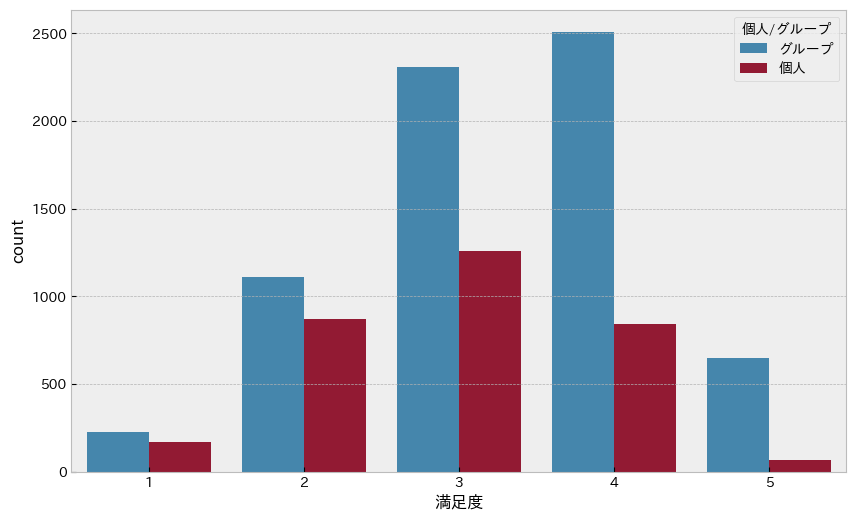

In [24]:
sns.countplot(x='満足度', hue='個人/グループ', data=df);

In [25]:
group = df.groupby('個人/グループ')
group['満足度'].agg(['mean', 'median'])

,mean,median
個人/グループ,,
グループ,3.331568,3.0
個人,2.926608,3.0


In [26]:
group1 = group.get_group('個人')
group2 = group.get_group('グループ')

In [27]:
group1.head(3)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
6,男性,10,個人,旅行,2,5,1,3,3,3,5,5,3,3


In [28]:
group1['満足度']

1       2
3       3
6       3
7       4
11      2
       ..
9990    2
9991    3
9993    3
9996    3
9999    4
Name: 満足度, Length: 3202, dtype: int64

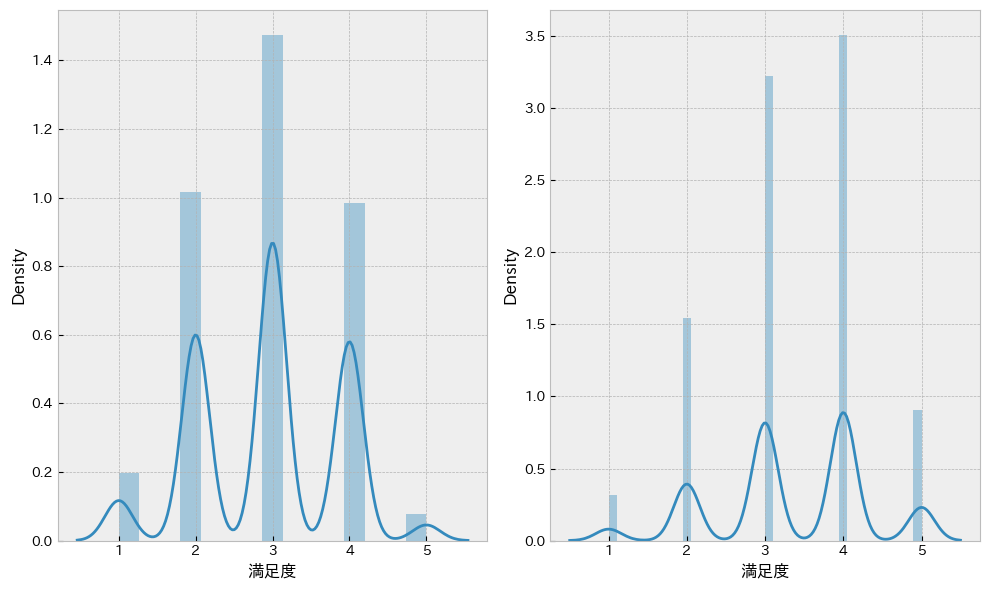

In [29]:
# 可視化  
plt.subplot(1, 2, 1)
sns.distplot(group1['満足度'])
plt.subplot(1, 2, 2)
sns.distplot(group2['満足度'])
plt.tight_layout()


In [30]:
# コルモゴロフ・スミルノフ検定
stats.kstest(group1['満足度'],"norm")

KstestResult(statistic=0.9244703552473236, pvalue=0.0, statistic_location=2, statistic_sign=-1)

In [31]:
stats.kstest(group2['満足度'],"norm")

KstestResult(statistic=0.9442990001494966, pvalue=0.0, statistic_location=2, statistic_sign=-1)

In [32]:
stats.mannwhitneyu(group1['満足度'], group2['満足度'], alternative='two-sided')

MannwhitneyuResult(statistic=8358463.5, pvalue=4.346100522969403e-86)

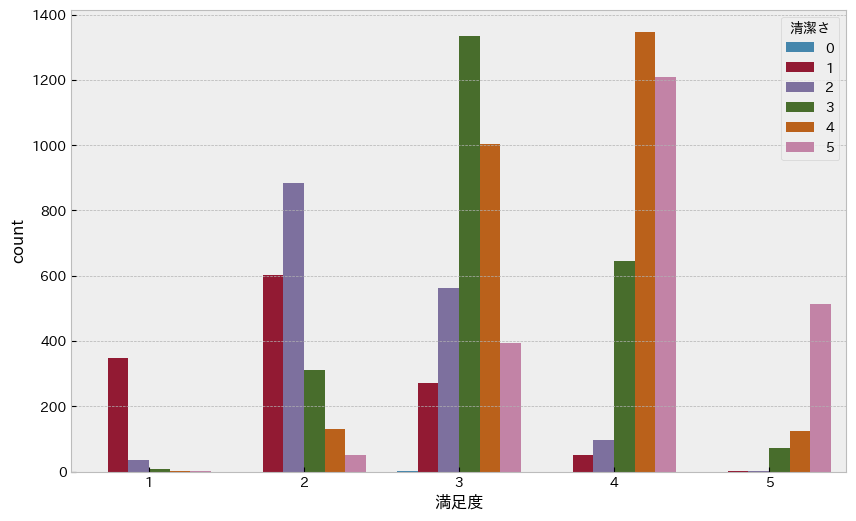

In [33]:
sns.countplot(x='満足度', hue='清潔さ', data=df);

In [34]:
# 清潔さの評価ごとの満足度の代表値
group = df.groupby('清潔さ')
group['満足度'].agg(['mean', 'median'])

,mean,median
清潔さ,,
0,3.000000,3.0
1,2.024371,2.0
2,2.459785,2.0
3,3.197385,3.0
4,3.561518,4.0
5,4.005535,4.0


In [35]:
# 関数化しておく
crosstab = pd.crosstab(df['満足度'], df['清潔さ'])
crosstab

清潔さ,0,1,2,3,4,5
満足度,,,,,,
1,0,348,35,7,2,1
2,0,601,884,310,129,52
3,1,270,561,1335,1005,394
4,0,50,97,646,1348,1208
5,0,3,2,73,125,513


In [36]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:7194.249228379877
p 値:0.0
自由度:20
